In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [9]:
df = pd.read_csv(r"D:\Programming\Github Repository\Design-Project---1\CarRentalReview.csv", encoding='ISO-8859-1')

In [11]:
print(df.head())

   id car_name                                             review
0   1  audi A6  Great pricing, smooth ride, and the car was sp...
1   2  audi A6  The car was great for the city, and the driver...
2   3  audi A4  Smooth drive through the mountains, but the re...
3   4  audi A3  The pricing was spot-on, and the car was very ...
4   5  audi Q3  Affordable price, and the car had no issues du...


In [13]:
pip install textblob

In [15]:
from textblob import TextBlob

In [17]:
# def get_rating(review):
#     analysis = TextBlob(review)
#     # Normalize the polarity score from [-1, 1] to [1, 5]
#     rating = int((analysis.sentiment.polarity + 1) * 2)  # scale to [0, 2]
#     rating += 1  # scale to [1, 5]
#     return rating

def get_rating(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    polarity += 1  # Shift the range from [-1, 1] to [0, 2]
    
    if polarity <= 0.4:  # -1.0 to -0.6 originally
        rating=1
    elif polarity <= 0.8:  # -0.6 to -0.2 originally
        rating=2
    elif polarity <= 1.2:  # -0.2 to 0.2 originally
        rating=3
    elif polarity <= 1.6:  # 0.2 to 0.6 originally
        rating=4
    else:  # > 0.6 originally
        rating=5
    
    print(f"(Polarity score: {polarity:.3f})")
    return rating

In [19]:
df['rating'] = df['review'].apply(get_rating)

(Polarity score: 1.482)
(Polarity score: 1.467)
(Polarity score: 1.339)
(Polarity score: 1.308)
(Polarity score: 1.333)
(Polarity score: 1.368)
(Polarity score: 1.208)
(Polarity score: 1.200)
(Polarity score: 1.450)
(Polarity score: 1.492)
(Polarity score: 1.380)
(Polarity score: 1.408)
(Polarity score: 1.315)
(Polarity score: 1.700)
(Polarity score: 1.493)
(Polarity score: 1.550)
(Polarity score: 1.386)
(Polarity score: 1.094)
(Polarity score: 1.453)
(Polarity score: 1.303)
(Polarity score: 1.902)
(Polarity score: 1.288)
(Polarity score: 1.442)
(Polarity score: 1.300)
(Polarity score: 1.353)
(Polarity score: 1.339)
(Polarity score: 1.365)
(Polarity score: 1.396)
(Polarity score: 1.056)
(Polarity score: 1.422)
(Polarity score: 1.600)
(Polarity score: 1.456)
(Polarity score: 1.567)
(Polarity score: 1.438)
(Polarity score: 1.433)
(Polarity score: 1.438)
(Polarity score: 1.733)
(Polarity score: 1.400)
(Polarity score: 1.383)
(Polarity score: 1.400)
(Polarity score: 1.453)
(Polarity score:

In [21]:
# Display the updated DataFrame with the rating column
print(df[['id', 'car_name', 'review', 'rating']].head())

   id car_name                                             review  rating
0   1  audi A6  Great pricing, smooth ride, and the car was sp...       4
1   2  audi A6  The car was great for the city, and the driver...       4
2   3  audi A4  Smooth drive through the mountains, but the re...       4
3   4  audi A3  The pricing was spot-on, and the car was very ...       4
4   5  audi Q3  Affordable price, and the car had no issues du...       4


In [23]:
# Count the occurrences of each sentiment rating
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

rating
3     6
4    59
5    13
Name: count, dtype: int64


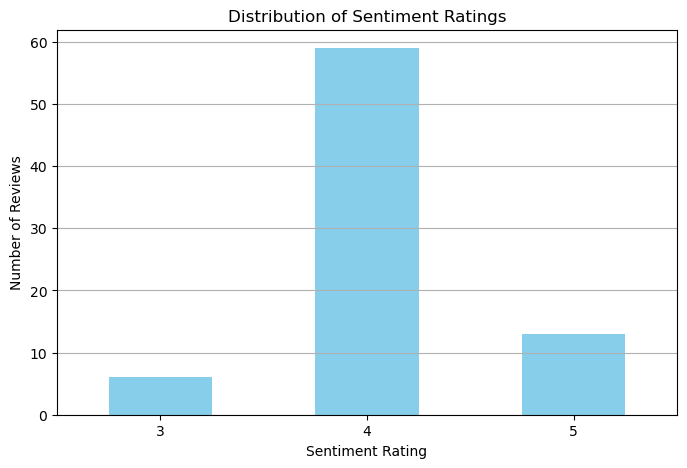

In [25]:
import matplotlib.pyplot as plt

# Create a bar plot of sentiment ratings
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Ratings')
plt.xlabel('Sentiment Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [27]:
# Specify the output file path
output_file_path = r"D:\Programming\Github Repository\Design-Project---1\RatingFromReview_TextBlob.csv"

# Save the DataFrame to a CSV file
df[['id', 'car_name', 'review', 'rating']].to_csv(output_file_path, index=False)
print(f"File saved at: {output_file_path}")

File saved at: D:\Programming\Github Repository\Design-Project---1\RatingFromReview_TextBlob.csv


In [29]:
pwd

'D:\\Programming\\Github Repository\\Design-Project---1'

In [31]:
import os
print(os.getcwd())

D:\Programming\Github Repository\Design-Project---1


In [33]:
print(df[['id', 'car_name', 'review', 'rating']].tail(2))

    id car_name                                           review  rating
76  77  New Car  The journey was awesome. The driver was helpful       5
77  78  New Car  The journey was awesome. The driver was helpful       5


In [35]:
import os

def add_review_and_update_csv(new_review):
    # Paths to the original and ratings CSV files
    original_file_path = r"D:\Programming\Github Repository\Design-Project---1\CarRentalReview.csv"
    output_file_path = r"D:\Programming\Github Repository\Design-Project---1\RatingFromReview_TextBlob.csv"

    # Load existing reviews
    df = pd.read_csv(original_file_path)

    # Generate a new ID for the new review
    new_id = df['id'].max() + 1 if not df.empty else 1

    # Calculate rating for the new review
    rating = get_rating(new_review)

    # Create a DataFrame for the new row (without the rating column)
    new_row = pd.DataFrame({
        'id': [new_id],
        'car_name': ['New Car'],
        'review': [new_review]
    })

    # Concatenate the new row with the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)

    # Save the updated DataFrame to the original file without the rating column
    df.to_csv(original_file_path, index=False)
    print(f"Original file updated and saved at: {original_file_path}")

    # Add the rating to the ratings CSV
    df_ratings = pd.read_csv(output_file_path) if os.path.exists(output_file_path) else pd.DataFrame(columns=['id', 'car_name', 'review', 'rating'])
    new_row_with_rating = new_row.copy()
    new_row_with_rating['rating'] = rating
    df_ratings = pd.concat([df_ratings, new_row_with_rating], ignore_index=True)
    df_ratings.to_csv(output_file_path, index=False)
    print(f"Ratings file updated and saved at: {output_file_path}")

# Example usage
# add_review_and_update_csv("The journey was awesome. The driver was helpful")